In [1]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
import time
from timm.data.mixup import Mixup

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")

In [33]:
train_data = torchvision.datasets.SVHN(root = './data', download = True, split = 'train', transform = transforms.ToTensor())
test_data = torchvision.datasets.SVHN(root = './data', download = True, split = 'test', transform = transforms.ToTensor())

tensor([[[0.3294, 0.3373, 0.3020,  ..., 0.3529, 0.3451, 0.3451],
         [0.3333, 0.3255, 0.2902,  ..., 0.3490, 0.3451, 0.3451],
         [0.3255, 0.3059, 0.2392,  ..., 0.3529, 0.3451, 0.3333],
         ...,
         [0.3922, 0.3843, 0.3725,  ..., 0.4078, 0.4000, 0.3922],
         [0.4039, 0.4157, 0.4039,  ..., 0.4039, 0.4039, 0.4118],
         [0.4039, 0.4039, 0.4078,  ..., 0.4431, 0.4078, 0.4039]],

        [[0.2980, 0.2863, 0.3059,  ..., 0.3059, 0.3020, 0.3059],
         [0.3020, 0.2863, 0.2706,  ..., 0.3216, 0.3098, 0.3176],
         [0.2980, 0.3020, 0.1961,  ..., 0.3333, 0.3255, 0.3216],
         ...,
         [0.3843, 0.3686, 0.3647,  ..., 0.4078, 0.4000, 0.3961],
         [0.4078, 0.4078, 0.4039,  ..., 0.4078, 0.4039, 0.3882],
         [0.4157, 0.4118, 0.4157,  ..., 0.4039, 0.4078, 0.3843]],

        [[0.2314, 0.2588, 0.2196,  ..., 0.2706, 0.2627, 0.2588],
         [0.2392, 0.2510, 0.2314,  ..., 0.2510, 0.2745, 0.2627],
         [0.2353, 0.2275, 0.2118,  ..., 0.2471, 0.2588, 0.

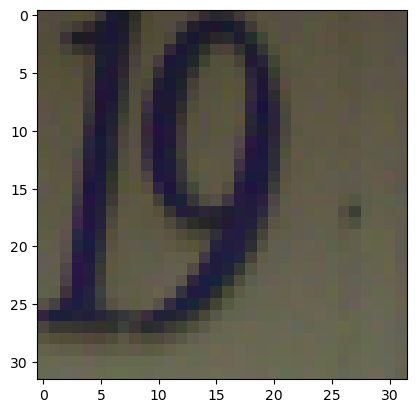

In [34]:
img, label = train_data[1]
plt.imshow(img.permute(1,2,0))
print(img)

In [15]:
train_batch_loader = DataLoader(train_data, batch_size = 8, shuffle = True, pin_memory = True, num_workers = 2)
test_batch_loader = DataLoader(test_data, batch_size = 8, shuffle = True, pin_memory = True, num_workers = 2)

In [18]:
mean = torch.zeros(3)
std = torch.zeros(3)
nb_samples = 0

# Iterate over the training DataLoader to compute mean and std.
for data, _ in train_batch_loader:
    batch_samples = data.size(0)
    # Reshape: (batch_size, channels, height * width)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples
print(mean, std)

tensor([0.4377, 0.4438, 0.4728]) tensor([0.1201, 0.1231, 0.1052])


In [19]:
transform_train = transforms.Compose([
    # transforms.Resize(244),
    transforms.RandomCrop(32, padding = 4),
    transforms.RandomRotation(10),
    # transforms.Scale(0.1),
    # transforms.Translate(),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

transform_test = transforms.Compose([
    # transforms.Resize(244),
    transforms.ToTensor(),
    transforms.Normalize(mean=mean, std=std)
])

In [20]:
train_data = torchvision.datasets.SVHN(root = './data', download = True, split = 'train', transform = transform_train)
test_data = torchvision.datasets.SVHN(root = './data', download = True, split = 'test', transform = transform_test)

In [21]:
train_batch_loader = DataLoader(train_data, batch_size = 8, shuffle = True, pin_memory = True, num_workers = 2)
test_batch_loader = DataLoader(test_data, batch_size = 8, shuffle = True, pin_memory = True, num_workers = 2)

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)

epochs = 10
for epoch in range(epochs):
    for x_train, y_train in train_batch_loader:
        y_pred = model(x_train)
        

In [ ]:
class SVHNModel():
    def __init__(self):
        super().__init__()
        